# 신경망

다층 퍼셉트론으로 아무리 비선형 구조를 한다 하여도 가중치는 수동으로 설정해줘야 한다.  
신경망은 그런 수동작업을 데이터로부터 자동으로 학습하여 그 값을 정한다.

##  퍼셉트론과 신경망의 차이

### 신경망의 구조

신경망에서 첫번째 층인 입력값을 받는 층은 **입력층**   
마지막 층은 **출력층**,      

그리고 **출력층**과 **입력층** 사이에 있는 층을 **은닉층**이라 한다.

### 활성화 함수

입력 신호의 종합을 출력 신호로 변환해주는 함수를 **활성화 함수**라고 한다.

### 계단 함수
아래와 같이 임계값을 경계로 출력이 바뀌는데, 이런 함수를 **계단함수**라고 한다.  
퍼셉트론은 이러한 계단 함수를 주로 이용한다.

In [3]:
def h(x):
    if x > 0: return 0
    else: return 1

In [ ]:
a = b + w1*x1 + w2*x2
h(a)

위 코드에서 볼 수 있듯이 h(x)는 **활성화 함수**이다,

계단함수를 그래프로 그리면 아래와 같이 된다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

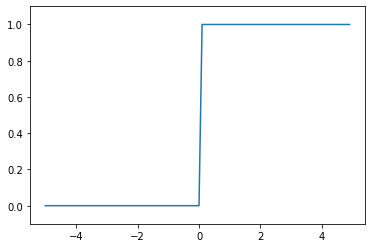

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축의 범위지정
plt.show()

### 시그모이드 함수

**h(x) = 1 / (1 + exp(-x))**

exp(-x)는 e의 -x승을 의미하며 e는 자연상수로 2.7182..의 값을 갖는 실수이다.  
기존의 0 OR 1을 나타내던 계단함수와 다르개 특정 값을 출력해준다.  

신경망에서는 시그모이드 함수를 이용하여 신호를 변환하고 전달한다.

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

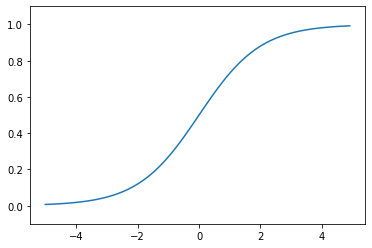

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 비선형 함수와 선형 함수

시그모이드, 계단 = 비선형 함수  
직선 하나로는 그릴 수 없는 함수 = 선형 함수

예를 들어 선형인 함수 h(x) = cx를 활성화 함수로 하는 3층 네트워크를 예시로 들면

y(x) = h(h(h(x))) = c * c * c * x로 표현할 수 있고 결국 y(x) = ax로 표현할 수 있다. 그렇기 때문에 선형 함수를 사용하면 여러 층으로 구성하는 이점을 살릴 수 없다.

## ReLU 함수

0 초과면 그대로 출력, 0 이하면 0을 출력하는 함수

In [3]:
def relu(x):
    return np.maximum(0,x)

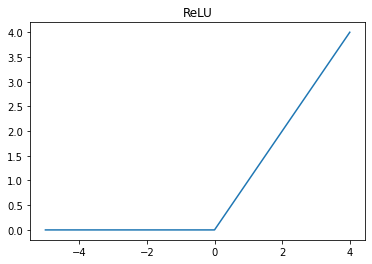

In [13]:
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4])
y = relu(x)

plt.plot(x,y)
plt.title("ReLU")
plt.show()

**행렬의 곱 np.dot(a,b)**

### 행렬의 곱을 이용해서 간단한 신경망 구축

입력 값 : 2  
출력 값 : 3  
사용 함수 : sigmoid  

1층 예시

In [18]:
x1 = np.array([1.0, 0.5]) #0층

w1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]]) #가증치

b = np.array([0.1,0.2,0.3]) #편향

a = np.dot(x1,w1) + b1 #첫번째 층

z = sigmoid(a)

print(a)
print(z)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


위와 같은 모양을 계속해서 여러층으로 쌓아나가면 신경망이 된다.

## 분류와 회귀

분류 : 데이터가 어느 클래스에 속하는가,주로 소프트맥스 함수  
회귀 : 입력 데이터에서 수치를 예측하는 문제, 항등 함수  

### 항등 함수

입력을 그대로 출력하는 함수, 즉 입력 == 출력

### 소프트맥스 함수

yk = exp(ak) / sum(exp(ai))   

exp(x) = ex를 뜻하는 지수 함수  
n = 출력층의 뉴런 수  
yk = k번째 출력  
ak = 입력 신호  

즉 ak의 지수함수 / 모든 입력 신호의 지수 함수의 합

아래는 소프트맥스 함수를 구현

In [39]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp = np.sum(exp_a)
    y = exp_a / sum_exp
    
    return y

In [24]:
print(x1)
softmax(x1)

[1.  0.5]


array([0.62245933, 0.37754067])

> 주의사항

지수 함수는 손쉽게 큰 값을 리턴하기 때문에 **오버플로우**를 조심해야한다. 

오버플로우를 피하기 위한 개선점
 = 

yk = exp(ak) / sum(exp(ai)) 

exp(ak) * c / sum(exp(ai)) * c    
(임의의 정수 C를 분자와 분모 양쪽에 곱한다.)  
exp(ak + log(c)) / sum(exp(ai + log(c)))  
(C를 exp안에 넣어준다.)  

C를 양쪽에 곱해줬기 때문에 어떤 값을 넣어도 기존의 값은 바뀌지 않는다.  
즉 큰값이 나오겠다 싶으면 log(c)에 값을 대입하여 빼줄 수 있다. 보통은 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

**위 식을 이용하여 개선된 소프트맥스 함수**

In [40]:
a = np.array([1010, 1000, 990])

print(softmax(a))

[nan nan nan]


<ipython-input-39-f8ffd00a867a>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-39-f8ffd00a867a>:4: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp


기존의 소프트맥스는 오버플로우가 발생한다.

In [19]:
import math

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp = np.sum(exp_a)
    y = exp_a / sum_exp
    
    return y

In [42]:
print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


하지만 개선된 소프트맥스는 오버플로우가 발생하지 않는다.

일반적인 소프트맥스는 0~1.0 사이의 실수를 출력하고 총 합이 1이다.

이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

여기서 주의할점      
소프트맥스는 단조 증가 함수(a >= b _> f(a) >= f(b))이기 때문에 각 원소의 대소 관계가 변하지 않는다.

*출력하는 뉴런의 수는 문제에 맞게 정하기*

## 손글씨 숫자 인식

*one-hot-encoding*은 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열

In [9]:
import sys,os
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [7]:
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape) #훈련 이미지, 훈련 레이블, 시험 이미지, 시험 레이블

(60000, 784) (60000,) (10000, 784) (10000,)


In [29]:
import pickle

def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'],network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

정확도 평가

In [33]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


입력을 할 데이터 여러개를 한번에 묶어서도 가능하다.  
이를 **배치**라 한다.  
  
배치를 이용하여 다시 구현

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))